# Tutorial

Jelle, updated May 2019

This notebook shows how to do basic analysis with straxen, much like `hax.minitrees`.

For reference, here are some jargon terms which we will introduce below:

  * **Context**: Holds configuration on how to process
  * **Dataframe** or **array**: table of related information produced by a plugin.
  * **Plugin**: an algorithm that produces a dataframe
  * **Data type**: specification of which columns are in a dataframe. 
  * **Data kind**: e.g. 'events' or 'peaks'. Dataframes of the same kind  have the same number of rows and can be merged.


In [68]:
import numpy as np
# This just ensures some comments in dataframes below display nicely
import pandas as pd
pd.options.display.max_colwidth = 100

## Setting up

In [69]:
import straxen
st = straxen.contexts.strax_workshop_dali()

In [70]:
st.select_runs()

Checking data availability: 100%|██████████| 5/5 [00:02<00:00,  2.53it/s]


,end,mode,name,number,reader.ini.name,start,tags,trigger.events_built,raw_records_available,event_info_available,events_available,records_available,peaks_available
0,2017-06-07 10:19:51+00:00,kr83m_stable,170607_0919,10265,kr83m_stable,2017-06-07 09:19:48+00:00,"SourceOpening,_sciencerun1_candidate,_sciencerun1",142182.0,True,True,True,True,True
1,2017-06-21 07:17:25+00:00,background_stable,170621_0617,10635,background_stable,2017-06-21 06:17:24+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",19084.0,True,True,True,True,True
2,2018-02-15 10:30:55+00:00,background_triggerless,180215_1029,16854,background_triggerless,2018-02-15 10:29:52+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",858.0,True,True,True,True,True
3,2018-02-16 14:24:47+00:00,background_triggerless,180216_1324,16887,background_triggerless,2018-02-16 13:24:43+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
4,2018-02-16 15:55:09+00:00,background_triggerless,180216_1455,16889,background_triggerless,2018-02-16 14:55:06+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
5,2018-02-16 17:25:29+00:00,background_triggerless,180216_1625,16891,background_triggerless,2018-02-16 16:25:26+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
6,2018-02-17 00:57:19+00:00,background_triggerless,180216_2357,16901,background_triggerless,2018-02-16 23:57:16+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
7,2018-02-17 02:27:41+00:00,background_triggerless,180217_0127,16903,background_triggerless,2018-02-17 01:27:38+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
8,2018-02-17 03:58:03+00:00,background_triggerless,180217_0257,16905,background_triggerless,2018-02-17 02:58:00+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
9,2018-02-17 05:28:23+00:00,background_triggerless,180217_0428,16907,background_triggerless,2018-02-17 04:28:20+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True


## Customization: new plugins

In [71]:
st.data_info('peak_basics')

,Field name,Data type,Comment
0,time,int64,Start time of the peak (ns since unix epoch)
1,endtime,int64,End time of the peak (ns since unix epoch)
2,area,float32,Peak integral in PE
3,n_channels,int16,Number of PMTs contributing to the peak
4,max_pmt,int16,PMT number which contributes the most PE
5,max_pmt_area,int32,Area of signal in the largest-contributing PMT (PE)
6,range_50p_area,float32,Width (in ns) of the central 50% area of the peak
7,area_fraction_top,float32,Fraction of area seen by the top array
8,length,int32,Length of the peak waveform in samples
9,dt,int16,Time resolution of the peak waveform in ns


In [78]:
import strax
import numpy as np

@strax.takes_config(
    strax.Option('primary_s2_area', default=150,
                 help="Size of S2 peak to be considered primary"),
    strax.Option('primary_s1_area', default=0,
                 help="Size of S1 peak to be considered primary"),
    strax.Option('n_primaries', default=3,
                 help="Number of primaries preceding SE to store")
    )

class SingleElectronPeaks(strax.Plugin):
    """Find delay to primary peaks for single electron studies"""

    provides = 'se_peaks'
    
    depends_on = ('peak_basics', 'peak_classification', 'peak_positions')
    
    data_kind = 'peaks'
    
    primary_dtype = [
        (('Classification of the n-th peak', 'is_primary'), np.int8),
        (('X position of the n-th peak', 'x'), np.float32),
        (('Y position of the n-th peak', 'y'), np.float32),
        (('Time of the n-th peak', 'time'), np.int64),
        (('End time of the n-th peak', 'endtime'), np.int64),
        (('Integral of the n-th peak', 'area'), np.float32)
        ]
    
    n_primaries=3 #self.config['n_primaries']
    
    dtype = [
        (('X position of the n-th peak', 'x_s2'), np.float32, n_primaries),
        (('Y position of the n-th peak', 'y_s2'), np.float32, n_primaries),
        (('Time of the n-th peak', 'time_s2'), np.int64, n_primaries),
        (('End time of the n-th peak', 'endtime_s2'), np.int64, n_primaries),
        (('Integral of the n-th peak', 'area_s2'), np.float32, n_primaries),
        ]
    
    __version__ = '0.0.7'

    def primaries(self, peaks, peak_type):
        
        p = peaks
        r = np.zeros(len(p), dtype=self.primary_dtype)
        is_s1_primary = p['type'] == 1
        is_s1_primary &= p['area'] >= self.config['primary_s1_area']
        r['is_primary'][is_s1_primary]=1
    
        is_s2_primary = p['type'] == 2
        is_s2_primary &= p['area'] >= self.config['primary_s2_area']
        r['is_primary'][is_s2_primary]=2
    
        r['time'] = p['time']
        r['x']=p['x']
        r['y']=p['y']
        r=r[r['is_primary']==peak_type]
    
        return r
    
    def compute(self, peaks):
        s2_primaries=self.primaries(peaks, 2)
        
        result = find_preceding_n(s2_primaries, peaks, self.n_primaries)
        result = axis1_to_structure(result, postfix='_s2', skip=(' ',))
        #print(result.dtype)
        return result
        


In [73]:
import numba

@numba.njit
def find_preceding_n(primaries, peaks, n):
    """Fill result with n nearest preceding x for each y"""
    result = np.zeros((len(peaks), n), dtype=primaries.dtype)
    
    nearest_prim_i = 0
    for i, p in enumerate(peaks):
        while True:
            if nearest_prim_i == len(primaries) - 1:
                break
            if primaries[nearest_prim_i + 1]['time'] >= p['time']:
                break
            nearest_prim_i += 1
        start = max(nearest_prim_i - (n - 1), 0) 
        stop = nearest_prim_i + 1
        result[i,:stop-start] = primaries[start:stop]
    return result
        



In [74]:

def axis1_to_structure(x, postfix='', skip=tuple()):
    
    n = x.shape[1]
    
    y = np.zeros(
        len(x),
        dtype=np.dtype(
            [((title, fn + postfix), y, n)
             for (title, fn), y in strax.unpack_dtype(x.dtype)
             if fn not in skip]))

    for j in range(n):
        for fn in x.dtype.names:
            if fn in skip:
                continue
            y[fn + postfix][:,j] = x[:,j][fn]
    return y

In [79]:
%%time
run_id = '180217_1130'
st.register(SingleElectronPeaks)
peaks = st.get_array(run_id, ['peak_basics','se_peaks', 'peak_positions'], config=dict(primary_s2_area=50))
#peaks_high = st.get_array(run_id, ['peak_basics','se_peaks'], config=dict(primary_s2_area=10000))
#peaks_low = st.get_array(run_id, ['peak_basics','se_peaks'], config=dict(primary_s2_area=50))

CPU times: user 2.18 s, sys: 1.62 s, total: 3.8 s
Wall time: 1.91 s


In [82]:
def delay_plot(df, plot_label):
    df=df[df['is_primary_s2']==0]
    plt.hist((df['time']-df['time_s2'][:,2])/10**6, 
                bins=np.linspace(0, 500, 1000),
                histtype='step',
                label = plot_label
            )
    plt.xlabel('Delay [ms]')
    plt.ylabel('Counts')
    plt.yscale('log')
    #plt.ylim(1e2, 1e7)
    
delay_plot(peaks, "500 PE")
#delay_plot(peaks_high, "10000 PE")
#delay_plot(peaks_low, "50 PE")
plt.ylim([500, 20000])
plt.legend(loc='best')
plt.show()

ValueError: no field of name is_primary_s2

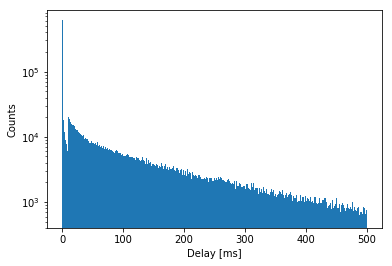

In [29]:
def delay_plot(df):
    plt.hist((df['time']-df['time_s2'][:,2])/10**6, 
                bins=np.linspace(0, 500, 1000)
            )
    plt.xlabel('Delay [ms]')
    plt.ylabel('Counts')
    plt.yscale('log')
    #plt.ylim(1e2, 1e7)
    
delay_plot(peaks)

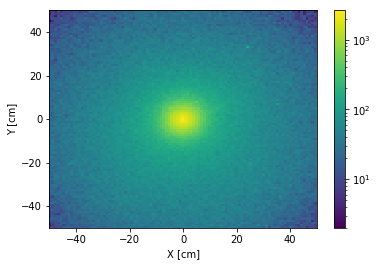

In [77]:
from matplotlib.colors import LogNorm

def pos_plot(df):
    plt.hist2d(df['x_s2'][:,2]-df['x'],
               df['y_s2'][:,2]-df['y'],
                bins=(np.linspace(-50, 50, 100),np.linspace(-50, 50, 100)),
               norm=LogNorm(), 
              )
    plt.xlabel('X [cm]')
    plt.ylabel('Y [cm]')
    plt.colorbar()
    #plt.ylim(1e2, 1e7)
  
pos_plot(peaks)
plt.show()

In [13]:
import strax
strax.Mailbox.DEFAULT_TIMEOUT = 600

### Change Playground

In [227]:
import strax
import numpy as np

@strax.takes_config(
    strax.Option('primary_s2_area', default=150,
                 help="Size of S2 peak to be considered primary"),
    strax.Option('primary_s1_area', default=0,
                 help="Size of S1 peak to be considered primary"),
    strax.Option('n_primaries', default=3,
                 help="Number of primaries preceding SE to store")
    )

class SingleElectronPeaks(strax.Plugin):
    """Find delay to primary peaks for single electron studies"""

    provides = 'se_peaks'
    
    depends_on = ('peak_basics', 'peak_classification', 'peak_positions')
    
    data_kind = 'peaks'
    
    primary_dtype = [
        (('Classification of the peak', 'is_primary'), np.int8),
        (('X position of the peak', 'x'), np.float32),
        (('Y position of the peak', 'y'), np.float32),
        (('Time of the peak', 'time'), np.int64),
        (('End time of the peak', 'endtime'), np.int64),
        (('Integral of the peak', 'area'), np.float32)
        ]
    
    def vector_dtype(self):
        n_primaries=self.config['n_primaries']
        dtype = [
            (('X position of the n-th peak', 'x_s2'), np.float32, n_primaries),
            (('Y position of the n-th peak', 'y_s2'), np.float32, n_primaries),
            (('Time of the n-th peak', 'time_s2'), np.int64, n_primaries),
            (('End time of the n-th peak', 'endtime_s2'), np.int64, n_primaries),
            (('Integral of the n-th peak', 'area_s2'), np.float32, n_primaries),
            ]
        return dtype
    
    #scalar_dtype = [
    #    (('Dummy Scalar', 'is_dummy'), np.int8)
    #    ]
    scalar_dtype = [
        ]
    
    def infer_dtype(self):
        dtype = [x for x in (self.vector_dtype()+self.scalar_dtype)]
        return dtype
      
    __version__ = '0.0.2'

    def primaries(self, peaks, peak_type):
        
        p = peaks
        r = np.zeros(len(p), dtype=self.primary_dtype)
        is_s1_primary = p['type'] == 1
        is_s1_primary &= p['area'] >= self.config['primary_s1_area']
        r['is_primary'][is_s1_primary]=1
    
        is_s2_primary = p['type'] == 2
        is_s2_primary &= p['area'] >= self.config['primary_s2_area']
        r['is_primary'][is_s2_primary]=2
    
        r['time'] = p['time']
        r['x']=p['x']
        r['y']=p['y']
        r=r[r['is_primary']==peak_type]
    
        return r
    
    def compute(self, peaks):
        s2_primaries=self.primaries(peaks, 2)
        
        result = find_preceding_n(s2_primaries, peaks, self.config['n_primaries']-1)
        result = axis1_to_structure(result,
                                    output_dtype = self.infer_dtype(),
                                    postfix='_s2',
                                    skip=('is_primary',),
                                    )
        #print(result.dtype)
        return result

In [222]:
import numba

@numba.njit
def find_preceding_n(primaries, peaks, n):
    """Fill result with n nearest preceding x for each y, and first suceding primary"""
    result = np.zeros((len(peaks), n + 1), dtype=primaries.dtype)
    
    nearest_prim_i = 0
    for i, p in enumerate(peaks):
        while True:
            if nearest_prim_i == len(primaries) - 1:
                break
            if primaries[nearest_prim_i + 1]['time'] >= p['time']:
                break
            nearest_prim_i += 1
        start = max(nearest_prim_i - (n - 1), 0) 
        stop = nearest_prim_i + 1
        result[i,:stop-start] = primaries[start:stop]
        if stop < len(primaries)-1:
            result[i, n] = primaries[stop+1]
    return result

In [223]:
def axis1_to_structure(x, output_dtype,
                       postfix='', skip=tuple(),):
    
    n = x.shape[1]
    
    y = np.zeros(
        len(x),
        dtype=np.dtype(
            [x for x in output_dtype]))
    print(y.dtype)
    
    #Range n-1 as last primary is after the peak
    for j in range(n):
        for fn in x.dtype.names:
            if fn in skip:
                continue
            y[fn + postfix][:,j] = x[:,j][fn]
            #add in post-primary....
    return y

In [228]:
run_id = '180217_1130'
st.register(SingleElectronPeaks)
peaks = st.get_array(run_id, ['peak_basics','se_peaks', 'peak_positions'], 
                     config=dict(primary_s2_area=50, n_primaries=5))

[(('X position of the n-th peak', 'x_s2'), '<f4', (5,)), (('Y position of the n-th peak', 'y_s2'), '<f4', (5,)), (('Time of the n-th peak', 'time_s2'), '<i8', (5,)), (('End time of the n-th peak', 'endtime_s2'), '<i8', (5,)), (('Integral of the n-th peak', 'area_s2'), '<f4', (5,))]
[(('X position of the n-th peak', 'x_s2'), '<f4', (5,)), (('Y position of the n-th peak', 'y_s2'), '<f4', (5,)), (('Time of the n-th peak', 'time_s2'), '<i8', (5,)), (('End time of the n-th peak', 'endtime_s2'), '<i8', (5,)), (('Integral of the n-th peak', 'area_s2'), '<f4', (5,))]


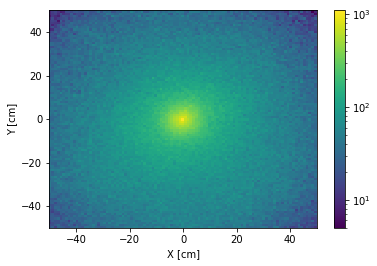

In [108]:
from matplotlib.colors import LogNorm

def pos_plot(df, primary):
    plt.hist2d(df['x_s2'][:,primary]-df['x'],
               df['y_s2'][:,primary]-df['y'],
                bins=(np.linspace(-50, 50, 100),np.linspace(-50, 50, 100)),
               norm=LogNorm(), 
              )
    plt.xlabel('X [cm]')
    plt.ylabel('Y [cm]')
    plt.colorbar()
    #plt.ylim(1e2, 1e7)
  
pos_plot(peaks, 4)
plt.show()

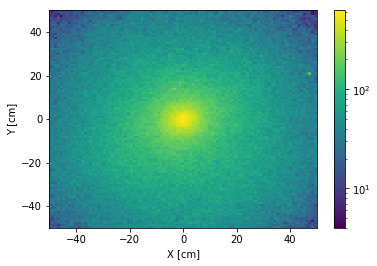

In [100]:
pos_plot(peaks, 1)
plt.show()